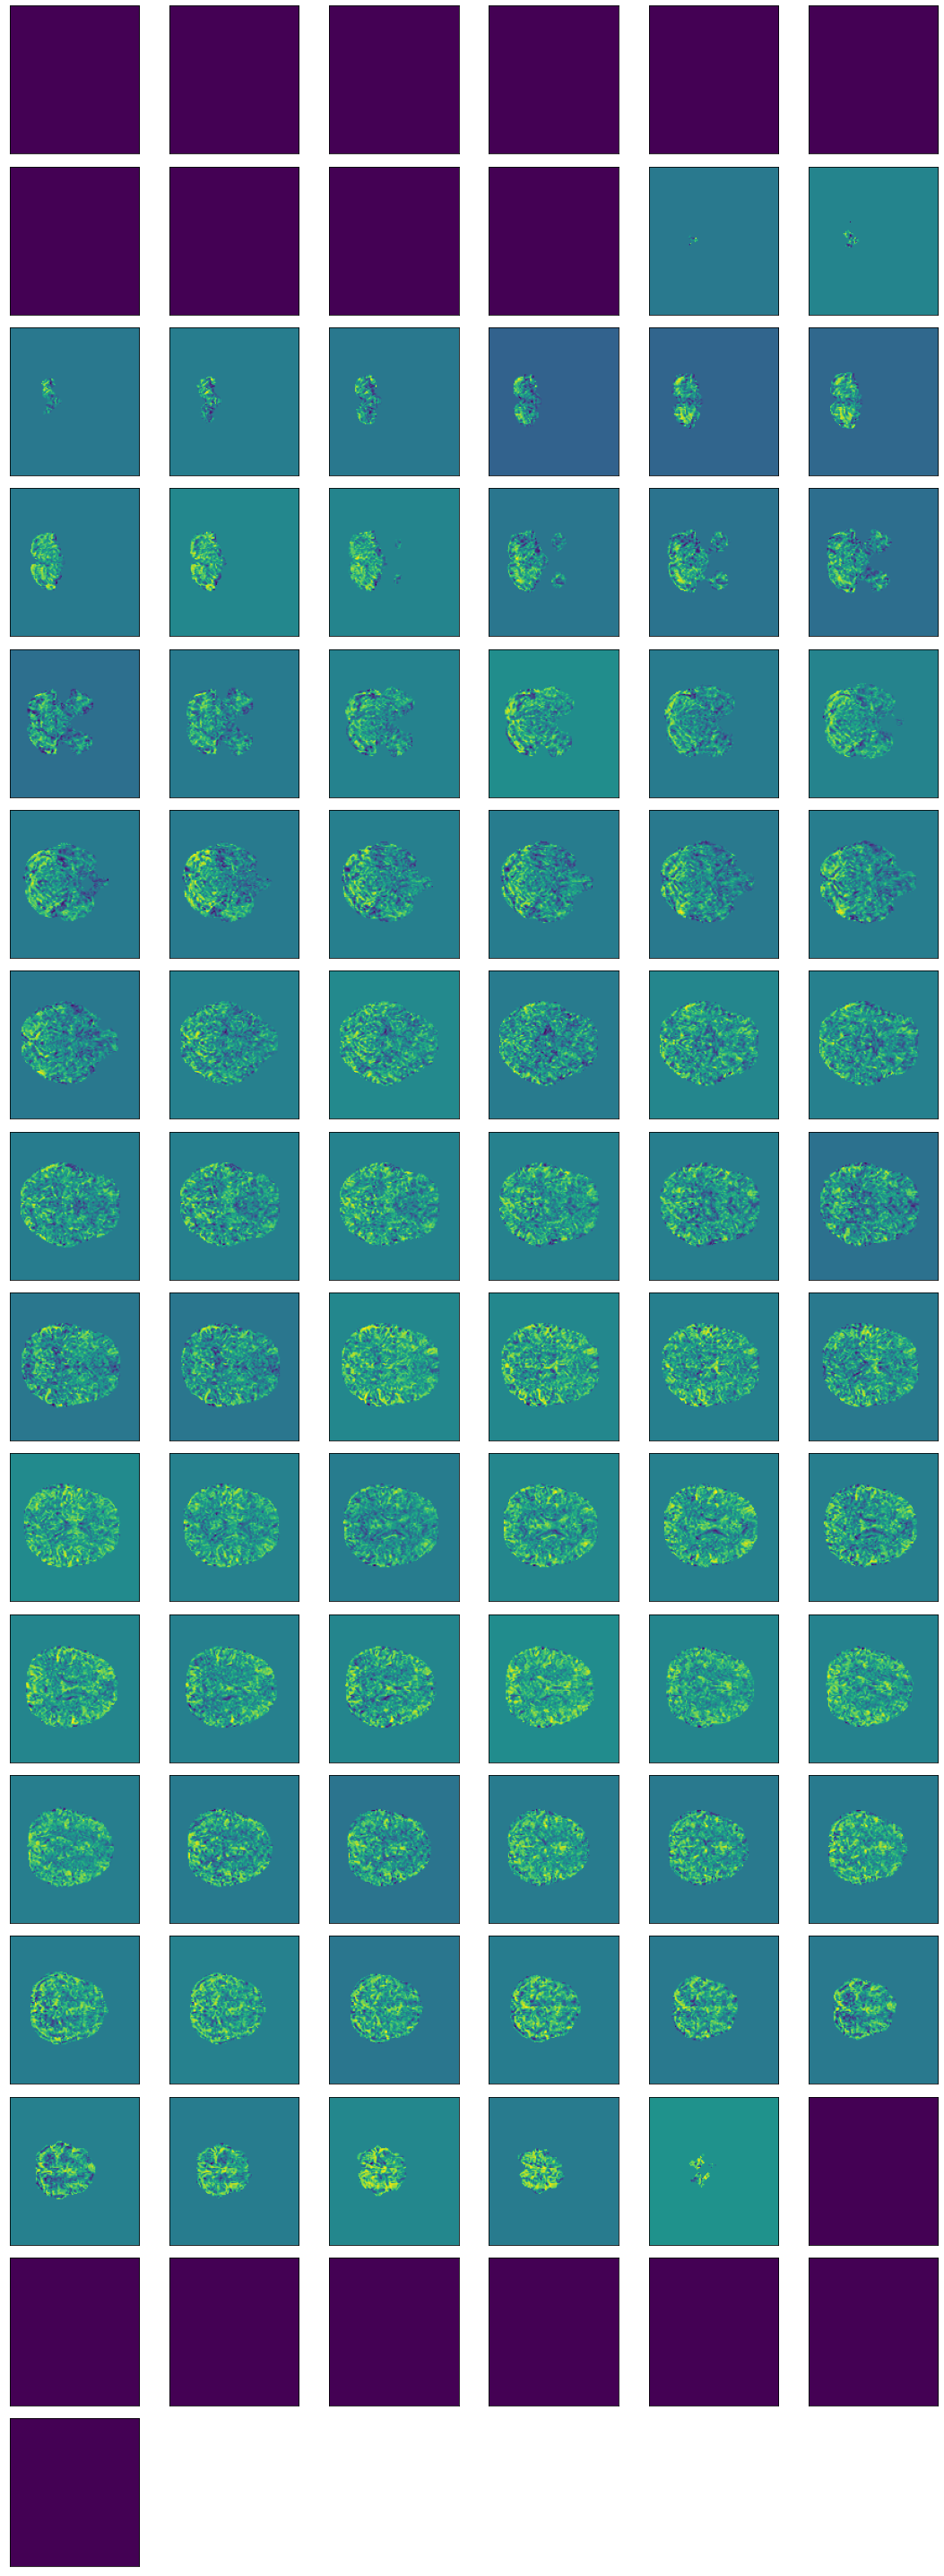

In [23]:
sample = gs_corr[:,:,:,0]

# define gridspec
fig = plt.figure(figsize=(15,40),tight_layout=True)
spec = gridspec.GridSpec(ncols=6, nrows=16, figure=fig)
axes = []

for i in range(sample.shape[2]):
    ax = fig.add_subplot(spec[i])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    img = ax.imshow(sample[:,:,i], cmap = 'viridis')
    axes.append(ax)

plt.show()

In [5]:
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [6]:
raw_data = np.array(nib.load("/data4/SNU/data/rsfMRI/C001-B0000-epi.nii.gz").dataobj)
raw_data.shape

(128, 128, 35, 190)

In [8]:
despike = np.array(nib.load("/data4/SNU/data/proc/C001.results/pb01.C001.r01.despike+orig.BRIK").dataobj)
despike.shape

(128, 128, 35, 190)

In [9]:
tshift = np.array(nib.load("/data4/SNU/data/proc/C001.results/pb02.C001.r01.tshift+orig.BRIK").dataobj)
tshift.shape

(128, 128, 35, 190)

In [11]:
volreg = np.array(nib.load("/data4/SNU/data/proc/C001.results/pb03.C001.r01.volreg+orig.BRIK").dataobj)
volreg.shape

(137, 120, 91, 190)

In [ ]:
= np.array(nib.load("").dataobj)
.shape

In [ ]:
= np.array(nib.load("").dataobj)
.shape

In [22]:
gs_corr = np.array(nib.load("/users/hjd/HJW_take_over/sample_data/C001.results/corr_brain+orig.BRIK").dataobj)
gs_corr.shape

(137, 120, 91, 1)

In [12]:
final= np.array(nib.load("/data4/SNU/data/proc/C001.results/all_runs.C001+orig.BRIK").dataobj)
final.shape

(137, 120, 91, 190)

## RSFC

In [15]:
rest_input = np.array(nib.load("/data4/SNU/data/output/C001/MNINonLinear/Results/rest/rest_Atlas_s0.dtseries.nii").dataobj)
rest_input.shape

(190, 91282)

In [18]:
cur_sbj_list = np.load("/data4/SNU/data/cur_sbj_list.npz")["X"]
bold_path = "/data4/SNU/data/output/"
bold_sbj_list = [x for x in os.listdir(bold_path) if x in cur_sbj_list]
bold_sbj_list = np.sort(bold_sbj_list)
bold_sbj_list

array(['C001', 'C002', 'C003', 'C004', 'C005', 'C008', 'C009', 'C011',
       'C012', 'C013', 'C014', 'C016', 'C017', 'C018', 'C019', 'C020',
       'C021', 'C022', 'C023', 'C024', 'C026', 'C027', 'C032', 'C034',
       'C035', 'C036', 'C037', 'C038', 'C039', 'C041', 'C042', 'C043',
       'C044', 'C045', 'C046', 'C047', 'C048', 'C049', 'C050', 'C051',
       'C052', 'C053', 'C054', 'C055', 'C056', 'C057', 'P001', 'P003',
       'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010', 'P011',
       'P012', 'P013', 'P014', 'P015', 'P016', 'P018', 'P019', 'P021',
       'P023', 'P024', 'P025', 'P026', 'P027', 'P028', 'P029', 'P031',
       'P032', 'P033', 'P034', 'P037', 'P038', 'P039', 'P040', 'P041',
       'P042', 'P044', 'P045', 'P046', 'P047', 'P048', 'P049', 'P050',
       'P052', 'P053', 'P054', 'P056', 'P057', 'P058', 'P060', 'P061',
       'P062', 'P063', 'P064', 'P065', 'P066', 'P067', 'P068', 'P069',
       'P070', 'P071', 'P072', 'P074', 'P075', 'P076', 'P077', 'P079',
      

In [ ]:
RSFC_list = []

for i, bold_sbj in enumerate(bold_sbj_list):
    
    bold_sbj_path = os.path.join(bold_path, bold_sbj + "/MNINonLinear")
    if Smoothing ==True:
        bold_sbj_path += "/Results/rest/rest_Atlas_s8.dtseries.nii"
    else:
        bold_sbj_path += "/Results/rest/rest_Atlas_s0.dtseries.nii"
    bold_sbj_nii = nib.load(bold_sbj_path)
    bold_sbj_arr = np.array(bold_sbj_nii.dataobj)
    
    tot_vols = len(bold_sbj_arr)
    if GSR:
        bold_sbj_arr -= np.expand_dims(np.mean(bold_sbj_arr, 1), 1)
    else:
        bold_sbj_arr -= np.expand_dims(np.mean(bold_sbj_arr, 0), 0)
    
    parc_bold = np.zeros((tot_vols, tot_rois), dtype=np.float32)
    
    for roi_idx in range(1, tot_rois + 1):
        roi_pos = ((parc_map_arr == roi_idx)).ravel()
        avg_bold = np.mean(bold_sbj_arr[:, roi_pos], axis=1).reshape(-1, 1)
        parc_bold[:, [roi_idx - 1]] = avg_bold
    
    corr_mat = np.corrcoef(parc_bold, rowvar=False)
    corr_mat_upper = corr_mat[np.triu_indices(tot_rois, k=1)]
    corr_mat_upper[np.where(corr_mat_upper>=1-1e-6)]=1-1e-6
    corr_mat_upper_rtoz = np.arctanh(corr_mat_upper).astype(np.float32)

    print(bold_sbj, corr_mat_upper_rtoz.shape,
          f"Mean:{'%.3f'}, Std:{'%.3f'}, Max:{'%.3f'}, Min:{'%.3f'}" %(np.mean(corr_mat_upper_rtoz),np.std(corr_mat_upper_rtoz),np.max(corr_mat_upper_rtoz),np.min(corr_mat_upper_rtoz)))
    RSFC_list.append(corr_mat_upper_rtoz)

In [ ]:
recon-all -s C001 -i /users/hjd/HJW_take_over/sample_data/T1/C001_T1w.nii -all -qcache

In [ ]:
afni_proc.py -script /users/hjd/HJW_take_over/sample_data/proc.C001 -scr_overwrite -subj_id \
    C001 -blocks despike tshift align volreg mask scale regress -copy_anat  \
    /users/hjd/HJW_take_over/sample_data/T1/C001-B0000.nii.gz -dsets                             \
    /users/hjd/HJW_take_over/sample_data/rsfMRI/C001-B0000-epi.nii.gz -align_opts_aea -cost      \
    lpc+ZZ -giant_move -check_flip -volreg_align_to MIN_OUTLIER             \
    -volreg_align_e2a -mask_epi_anat yes -mask_segment_anat yes -mask_apply \
    anat -regress_censor_motion 0.3 -regress_censor_outliers 0.1            \
    -regress_bandpass 0.008 0.09 -regress_apply_mot_types demean deriv      \
    -html_review_style pythonic

In [ ]:
3dresample -input /users/hjd/HJW_take_over/sample_data/C001.results/all_runs.C001+orig   \
       -master ${mni_dir}/ROIs/Atlas_ROIs.2.nii.gz                 \
       -prefix ${epi_dir}/proc_bold.nii.gz                         \
       -overwrite -debug 1